In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./weatherAUS.csv')

# 1. Analisis exploratorio de datos.

In [4]:
data.shape

(145460, 23)

#### Previsualizacion los datos.

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Solo las variables Date y Location contienen la totalidad de los datos. 

In [8]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

##### Propiedades estadísticas del conjunto de datos.

In [9]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# 2. Analisis univariado.

### Exploracion de la variable objetivo RainTomorrow.

In [10]:
data['RainTomorrow'].isnull().sum()

3267

Hay 3267 valores faltantes en la variable objetivo.

In [11]:
data['RainTomorrow'].nunique()

2

In [12]:
data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

**Distribución de frecuencia de los valores:**

In [13]:
data['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

**Porcentaje de distribución de frecuencia de valores:**

In [14]:
data['RainTomorrow'].value_counts()/len(data)

RainTomorrow
No     0.758394
Yes    0.219146
Name: count, dtype: float64

**Visualizacion de la distribución de frecuencias de la variable RainTomorrow:**

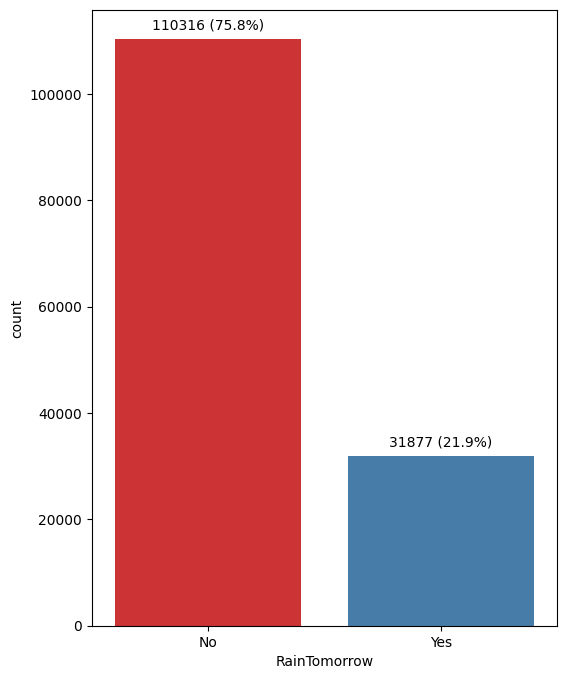

In [18]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", hue="RainTomorrow", data=data, palette="Set1", legend=False)

total = len(data)
for p in ax.patches:
    count = format(p.get_height(), '.0f')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count} ({percentage})', (x, y), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# 3. Analisis bivariado.

### Variables categoricas.

In [21]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print(f'Hay {format(len(categorical))} variables categóricas: \n{categorical}')

Hay 7 variables categóricas: 
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [23]:
data[categorical].sample(10)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
57679,20/03/2016,Ballarat,SE,SSE,ESE,No,No
142900,18/10/2014,Katherine,E,NW,SSE,No,No
31225,16/12/2010,Sydney,SSE,ENE,NNW,No,Yes
104102,27/06/2013,Nuriootpa,NNE,NE,WNW,No,No
128046,01/06/2012,Walpole,SE,SE,SE,Yes,Yes
94238,16/08/2011,Townsville,ENE,ESE,ENE,No,No
133372,07/11/2009,Launceston,NW,E,NW,No,No
7352,26/08/2012,Cobar,SW,NW,SW,No,No
16788,06/11/2013,Newcastle,NaN,NE,SE,No,No
72657,12/06/2015,Mildura,NNE,E,NNE,No,No


De las variables categorias, 2 de ellas son binarias: RainToday y RainTomorrow (variable objetivo).

### Exploracion de variables categóricas.

Valores faltantes en variables categóricas:

In [24]:
data[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

**Recuento de frecuencia de variables categóricas.**

Frecuencia de las variables categóricas:

In [26]:
for var in categorical:     
    print(data[var].value_counts())

Date
12/11/2013    49
01/09/2014    49
23/08/2014    49
24/08/2014    49
25/08/2014    49
              ..
29/11/2007     1
28/11/2007     1
27/11/2007     1
26/11/2007     1
31/01/2008     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAA

Distribución de frecuencias de las variables categóricas:

In [28]:
for var in categorical:    
    print(data[var].value_counts()/np.float64(len(data)))

Date
12/11/2013    0.000337
01/09/2014    0.000337
23/08/2014    0.000337
24/08/2014    0.000337
25/08/2014    0.000337
                ...   
29/11/2007    0.000007
28/11/2007    0.000007
27/11/2007    0.000007
26/11/2007    0.000007
31/01/2008    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.02

**Cardinalidad.**

Analisis de variables que puedan tener alta cardinalidad.

In [35]:
max_length = max(len(var) for var in categorical)

for var in categorical:    
    print(f'{var.ljust(max_length)} \t{len(data[var].unique())} etiquetas.')

Date         	3436 etiquetas.
Location     	49 etiquetas.
WindGustDir  	17 etiquetas.
WindDir9am   	17 etiquetas.
WindDir3pm   	17 etiquetas.
RainToday    	3 etiquetas.
RainTomorrow 	3 etiquetas.


**Variable de Date.**

Extraccion de valores Year, Month, and Day de la variable Date en nuevas columnas.

In [37]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [39]:
data.drop('Date', axis=1, inplace = True)